# Clase 14/05

Se pide diseñar un filtro de maxima planicidad que satisfaga las siguientes plantillas:

- fp = 17 Hz
- fs = 200 Hz
- αmax = 3 dB
- αmin = 15 dB
---------------------------------
- fp = 17 Hz
- fs = 50 Hz
- αmax = 3 dB
- αmin = 90 dB

Partiendo de la ecuación del módulo del cuadrado de la transferencia para un filtro de máxima planicidad:

$$
|H(ω)|^{2} = \frac{1}{1+\epsilon^{2}\omega^{2n}}
$$

Se normalizan las frecuencias angulares tomando la siguiente norma:

$$
\omega_{p} = 2 \pi 17Hz \Rightarrow \Omega_{p} = 1
$$

Las frecuencias normalizadas son:

$$
\Omega_{p} = 1 \\\Omega_{s} = 3
$$

Se calcula el valor de epsilon al cuadrado: 

$$
\epsilon^{2} = 10^{0,1.\alpha_{max}}-1
$$

In [1]:
alpha_max = 3

eps = 10 ** (0.1 * alpha_max) - 1
eps = round(eps, 2)

eps

1.0

Se calcula el orden del filtro teniendo en cuenta que la segunda plantilla es la que determina el orden del filtro debido a que es la de mayor exigencia:

$$
n = \frac{log(\frac{10^{0,1.\alpha_{min}}-1}{\epsilon^{2}})}{2log(\Omega_{s})}
$$

In [2]:
import math

alpha_min = 90
ws = 3

num = math.log((10 ** (0.1 * alpha_min) - 1) / (eps), 10)
den = 2 * math.log(ws, 10)
order = math.ceil(num / den)

order

10

La implementación resultará técnicamente muy exigente y costosa por el muy alto orden. El objetivo primordial es reducir al mínimo la banda de transición, incorporando en ella un cero finito, que lleva la atenuación a un valor
infinito en la frecuencia en cuestión.

Se utilizara un filtro de Thompson, el cual tiene las siguientes caracteristicas:
- Posee máxima planicidad en banda de paso
- Incorpora un cero finito en la banda detenida
- Asume que, siempre que el cero finito esté suficientemente alejado de la banda de paso (más de una octava aprox.), bastará con colocar los polos del pasabajos en condición de máxima planicidad para que la banda de paso tenga máxima planicidad

Se tratará de polos Butterworth, con un orden mínimo de N=3, siendo la atenuación en alta frecuencia de (N2)*20dB/década, por efecto del cero finito.

$$
T(s) = \frac{s^{2}+9}{s^{3}+2s^{2}+2s+1}
$$

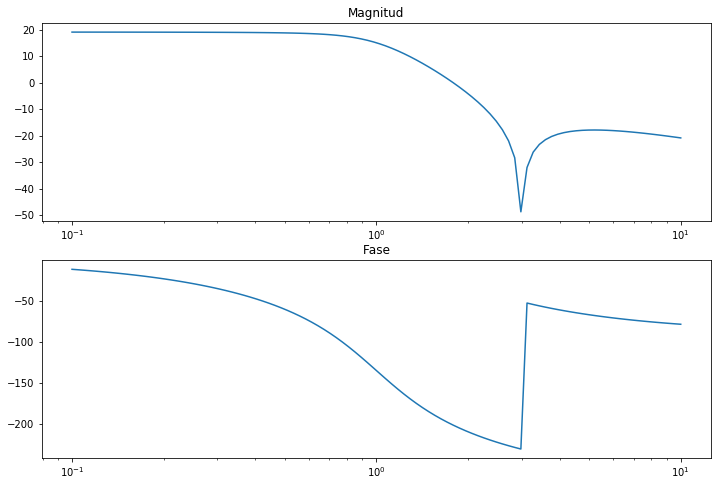

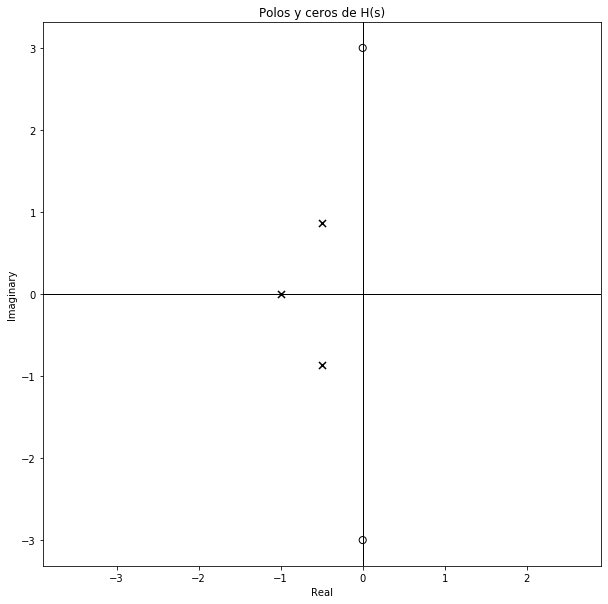

In [35]:
import control
from scipy import signal as sig
import matplotlib.pyplot as plt


num = [1, 0 , 9]
den = [1, 2, 2, 1]

tf = sig.TransferFunction(num, den)
w, mag, phase = sig.bode(tf)

fig, axes = plt.subplots(2, figsize=(12,8))

axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[0].set_xlim([10**-1,10**2])
axes[1].set_xlim([10**-1,10**2])

axes[0].plot(w, mag)
axes[1].plot(w, phase)

axes[0].set_title("Magnitud")
axes[1].set_title("Fase")

plt.show()

control.pzmap(control.TransferFunction(num, den), Plot=True,
              title="Polos y ceros de H(s)")
plt.show()

Para implementar esta trasnferencia separaremos la transferencia de la siguiente manera:

$$
T(s) = \frac{s^{2}+9}{s^{3}+2s^{2}+2s+1} = \frac{s^{2}+9}{s^{2}+s+1}\frac{1}{s+1} = (\frac{s^{2}}{s^{2}+s+1}+\frac{9}{s^{2}+s+1})\frac{1}{s+1}
$$

Se puede apreciar que es posible separar la transferencia como un pasaltos y un pasabajos con un mismo denominador en cascada con un pasabajos de orden 1.

Al tener igual denominador, pueden generarse a partir del mismo circuito, recordando que HP está invertida, y que sobre
LP, debemos aplicar un factor de ganancia “9”. Para sumar, una etapa de -1 debera invertir la salida LP.

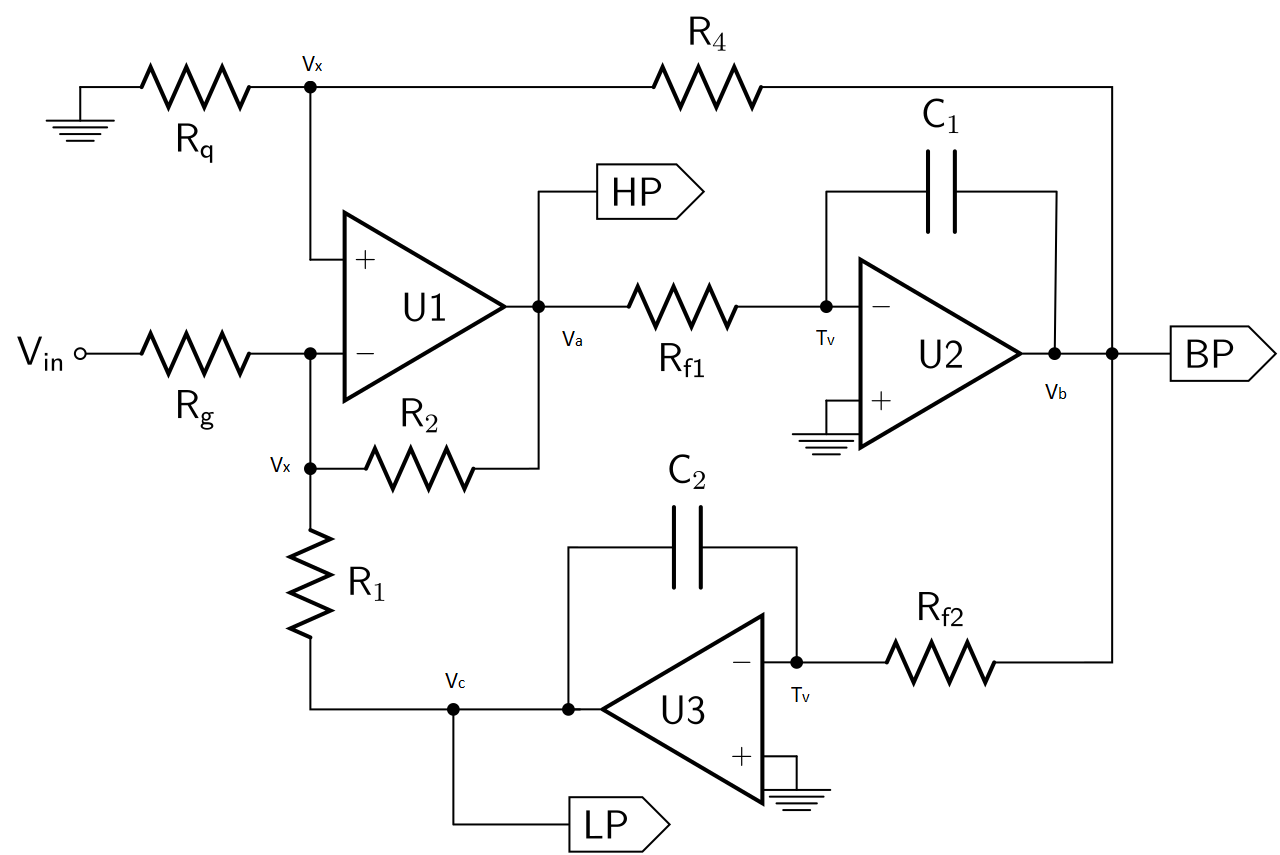

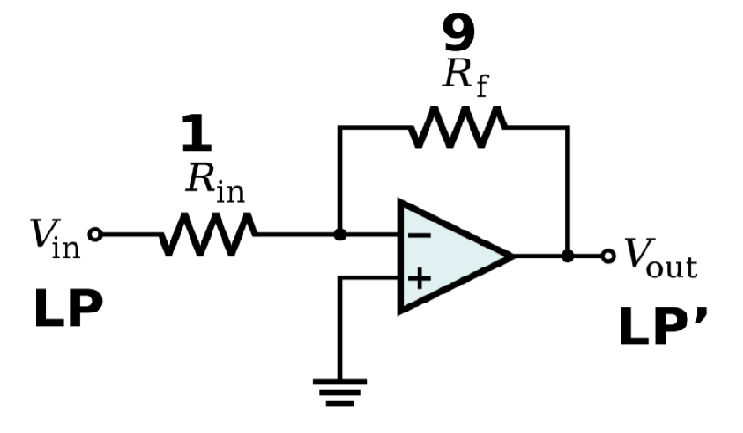

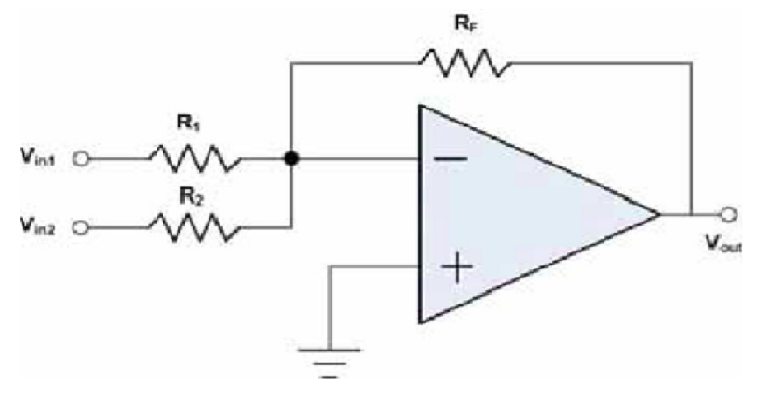

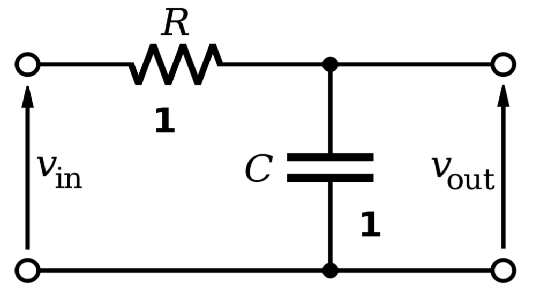

## Calculo de componentes

### FIltro KHN

Siendo los parametros del filtro KHN:

$$
K_{lp} = \frac{R_{1}}{R_{g}}~~~~~~~~K_{hp} = \frac{R_{2}}{R_{g}}~~~~~~~~\frac{\omega_{0}}{Q}=\frac{R_{2}}{R_{f1}C_{1}}\frac{R_{q}}{R_{4}+R_{q}}(\frac{1}{R_{1}}+\frac{1}{R_{2}}+\frac{1}{R_{4}})~~~~~~~~\omega_{0}^{2}=\frac{R_{2}}{R_{f1}R_{f2}R_{1}C_{1}C_{2}}
$$

$$
K_{lp}=K_{hp}=1~~~~~~\omega_{0}^{2}=1~~~~~~Q=1
$$

Asumo:
$$
C_{1}=C_{2}=C, ~R_{f1}=R_{f2}=R, ~R_{1}=R_{2}=R_{3}=R_{\alpha}
$$

$$
\omega_{0}^{2}=\frac{R_{\alpha}}{C^{2}R^{2}R_{\alpha}}~~~\Rightarrow~~~\omega_{0}^{2}=\frac{R_{\alpha}}{RC}\frac{R_{q}}{R_{\alpha}+R_{q}}\frac{3}{R_{\alpha}}~~~\Rightarrow~~~\frac{\omega_{0}}{Q}= \frac{3R_{q}}{CR(R_{\alpha}+R_{q})}
$$

Impongo:
$$
C=1~~~;~~~R^{2}=\frac{1}{\omega_{0}^{2}}~~~\Rightarrow~~~R=1~~~;~~~1=\frac{2R_{q}}{R_{\alpha}+R_{q}}~~~\Rightarrow~~~R_{\alpha}+R_{q}=2R_{q}~~~\Rightarrow~~~R_{\alpha}=R_{q}
$$

Impongo:
$$
R_{g}=1~~~;~~~R_{\alpha}=1~~~;~~~R_{q}=1
$$